>### 🚩 *Create a free WhyLabs account to get more value out of whylogs!*<br> 
>*Did you know you can store, visualize, and monitor whylogs profiles with the [WhyLabs Observability Platform](https://whylabs.ai/whylogs-free-signup?utm_source=whylogs-Github&utm_medium=whylogs-example&utm_campaign=Image_Logging)? Sign up for a [free WhyLabs account](https://whylabs.ai/whylogs-free-signup?utm_source=whylogs-Github&utm_medium=whylogs-example&utm_campaign=Image_Logging) to leverage the power of whylogs and WhyLabs together!*

# Image Logging

Whylogs has optional support for logging data about images. This example demonstrates how to use whylogs with image data.

## Install whylogs with Image Logging Support

Whylogs uses [Pillow](https://python-pillow.org) for working with images. To install whylogs with the optional image support enabled, use the following:








In [ ]:
# Note: you may need to restart the kernel to use updated packages.
%pip install 'whylogs[image,whylabs]'

This will install all the dependencies whylogs needs to work with image data.

## Basic Image Logging

The `log_image()` function provides a simple interface for logging images.

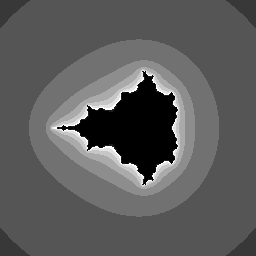

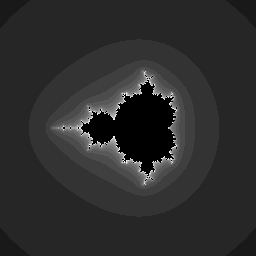

{'image/ImagePixelWidth:counts/n': 1, 'image/ImagePixelWidth:counts/null': 0, 'image/ImagePixelWidth:types/integral': 1, 'image/ImagePixelWidth:types/fractional': 0, 'image/ImagePixelWidth:types/boolean': 0, 'image/ImagePixelWidth:types/string': 0, 'image/ImagePixelWidth:types/object': 0, 'image/ImagePixelWidth:cardinality/est': 1.0, 'image/ImagePixelWidth:cardinality/upper_1': 1.000049929250618, 'image/ImagePixelWidth:cardinality/lower_1': 1.0, 'image/ImagePixelWidth:distribution/mean': 256.0, 'image/ImagePixelWidth:distribution/stddev': 0.0, 'image/ImagePixelWidth:distribution/n': 1, 'image/ImagePixelWidth:distribution/max': 256.0, 'image/ImagePixelWidth:distribution/min': 256.0, 'image/ImagePixelWidth:distribution/q_01': 256.0, 'image/ImagePixelWidth:distribution/q_05': 256.0, 'image/ImagePixelWidth:distribution/q_10': 256.0, 'image/ImagePixelWidth:distribution/q_25': 256.0, 'image/ImagePixelWidth:distribution/median': 256.0, 'image/ImagePixelWidth:distribution/q_75': 256.0, 'image/

In [2]:
from PIL import Image

from whylogs.extras.image_metric import log_image

img1 = Image.effect_mandelbrot((256, 256), (-3, -2.5, 2, 2.5), 9)
img2 = Image.effect_mandelbrot((256, 256), (-3, -2.5, 2, 2.5), 20)

display(img1)
display(img2)

results = log_image(img1)
print(results.view().get_column("image").to_summary_dict())

As you can see above, just passing in an `Image` results in a column named "image" in the profile. You can pass in a list of images, which will append an index to each column name:

In [3]:
results = log_image([img1, img2])
print(list(results.view().get_columns()))
print(results.view().get_column("image_1").to_summary_dict())

['image_0', 'image_1']
{'image/ImagePixelWidth:counts/n': 1, 'image/ImagePixelWidth:counts/null': 0, 'image/ImagePixelWidth:types/integral': 1, 'image/ImagePixelWidth:types/fractional': 0, 'image/ImagePixelWidth:types/boolean': 0, 'image/ImagePixelWidth:types/string': 0, 'image/ImagePixelWidth:types/object': 0, 'image/ImagePixelWidth:cardinality/est': 1.0, 'image/ImagePixelWidth:cardinality/upper_1': 1.000049929250618, 'image/ImagePixelWidth:cardinality/lower_1': 1.0, 'image/ImagePixelWidth:distribution/mean': 256.0, 'image/ImagePixelWidth:distribution/stddev': 0.0, 'image/ImagePixelWidth:distribution/n': 1, 'image/ImagePixelWidth:distribution/max': 256.0, 'image/ImagePixelWidth:distribution/min': 256.0, 'image/ImagePixelWidth:distribution/q_01': 256.0, 'image/ImagePixelWidth:distribution/q_05': 256.0, 'image/ImagePixelWidth:distribution/q_10': 256.0, 'image/ImagePixelWidth:distribution/q_25': 256.0, 'image/ImagePixelWidth:distribution/median': 256.0, 'image/ImagePixelWidth:distributio

You can change the default name if you like:

In [4]:
results = log_image([img1, img2], default_column_prefix="awesome_image")
print(list(results.view().get_columns()))
print(results.view().get_column("awesome_image_0").to_summary_dict())

['awesome_image_0', 'awesome_image_1']
{'image/ImagePixelWidth:counts/n': 1, 'image/ImagePixelWidth:counts/null': 0, 'image/ImagePixelWidth:types/integral': 1, 'image/ImagePixelWidth:types/fractional': 0, 'image/ImagePixelWidth:types/boolean': 0, 'image/ImagePixelWidth:types/string': 0, 'image/ImagePixelWidth:types/object': 0, 'image/ImagePixelWidth:cardinality/est': 1.0, 'image/ImagePixelWidth:cardinality/upper_1': 1.000049929250618, 'image/ImagePixelWidth:cardinality/lower_1': 1.0, 'image/ImagePixelWidth:distribution/mean': 256.0, 'image/ImagePixelWidth:distribution/stddev': 0.0, 'image/ImagePixelWidth:distribution/n': 1, 'image/ImagePixelWidth:distribution/max': 256.0, 'image/ImagePixelWidth:distribution/min': 256.0, 'image/ImagePixelWidth:distribution/q_01': 256.0, 'image/ImagePixelWidth:distribution/q_05': 256.0, 'image/ImagePixelWidth:distribution/q_10': 256.0, 'image/ImagePixelWidth:distribution/q_25': 256.0, 'image/ImagePixelWidth:distribution/median': 256.0, 'image/ImagePixelW

You can also pass a dictionary of images to give each "column" a unique name:

In [5]:
results = log_image({"left_camera": img1, "right_camera": img2})
print(results.view().get_column("right_camera").to_summary_dict())

{'image/ImagePixelWidth:counts/n': 1, 'image/ImagePixelWidth:counts/null': 0, 'image/ImagePixelWidth:types/integral': 1, 'image/ImagePixelWidth:types/fractional': 0, 'image/ImagePixelWidth:types/boolean': 0, 'image/ImagePixelWidth:types/string': 0, 'image/ImagePixelWidth:types/object': 0, 'image/ImagePixelWidth:cardinality/est': 1.0, 'image/ImagePixelWidth:cardinality/upper_1': 1.000049929250618, 'image/ImagePixelWidth:cardinality/lower_1': 1.0, 'image/ImagePixelWidth:distribution/mean': 256.0, 'image/ImagePixelWidth:distribution/stddev': 0.0, 'image/ImagePixelWidth:distribution/n': 1, 'image/ImagePixelWidth:distribution/max': 256.0, 'image/ImagePixelWidth:distribution/min': 256.0, 'image/ImagePixelWidth:distribution/q_01': 256.0, 'image/ImagePixelWidth:distribution/q_05': 256.0, 'image/ImagePixelWidth:distribution/q_10': 256.0, 'image/ImagePixelWidth:distribution/q_25': 256.0, 'image/ImagePixelWidth:distribution/median': 256.0, 'image/ImagePixelWidth:distribution/q_75': 256.0, 'image/

##  EXIF Tag Logging

whylogs will include any EXIF tags with numeric or string values in the image profile. PIL's EXIF facilities are rudimentary, so we'll use the piexif library to construct EXIF tags for this example. See the Advanced Image Logging section for how to control which EXIF tags are tracked.

In [6]:
%pip install piexif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import piexif
zeroth_ifd = {
  piexif.ImageIFD.Artist: u"someone",
  piexif.ImageIFD.XResolution: (96, 1),
  piexif.ImageIFD.YResolution: (96, 1),
  piexif.ImageIFD.Software: u"piexif"
}
exif_ifd = {
  piexif.ExifIFD.DateTimeOriginal: u"2099:09:29 10:10:10",
  piexif.ExifIFD.LensMake: u"LensMake",
  piexif.ExifIFD.Sharpness: 65535,
  piexif.ExifIFD.LensSpecification: ((1, 1), (1, 1), (1, 1), (1, 1)),
}
exif_dict = {"0th": zeroth_ifd, "Exif": exif_ifd}
exif_bytes = piexif.dump(exif_dict)
img2.save("out.jpg", exif=exif_bytes)
img3 = Image.open("out.jpg")
print(img3._getexif())

results = log_image(img3)
print(results.view().get_column("image").to_summary_dict())

{36867: '2099:09:29 10:10:10', 41994: 65535, 282: (96, 1), 283: (96, 1), 34665: 105, 305: 'piexif', 42034: ((1, 1), (1, 1), (1, 1), (1, 1)), 42035: 'LensMake', 315: 'someone'}
{'image/DateTimeOriginal:counts/n': 1, 'image/DateTimeOriginal:counts/null': 0, 'image/DateTimeOriginal:types/integral': 0, 'image/DateTimeOriginal:types/fractional': 0, 'image/DateTimeOriginal:types/boolean': 0, 'image/DateTimeOriginal:types/string': 1, 'image/DateTimeOriginal:types/object': 0, 'image/DateTimeOriginal:cardinality/est': 1.0, 'image/DateTimeOriginal:cardinality/upper_1': 1.000049929250618, 'image/DateTimeOriginal:cardinality/lower_1': 1.0, 'image/DateTimeOriginal:frequent_items/frequent_strings': [FrequentItem(value='2099:09:29 10:10:10', est=1, upper=1, lower=1)], 'image/ExifIFD:counts/n': 1, 'image/ExifIFD:counts/null': 0, 'image/ExifIFD:types/integral': 1, 'image/ExifIFD:types/fractional': 0, 'image/ExifIFD:types/boolean': 0, 'image/ExifIFD:types/string': 0, 'image/ExifIFD:types/object': 0, 'im

## Advanced Image Logging

The `log_image()` function provides a flexible interface for logging image data. If you want to log images along with other types of data, you can do so by setting up a custom `DatasetSchema` to specify which columns contain images. For this example, we'll compute a couple of features from the image and log them along with the image itself in a Pandas `DataFrame`. We subclass the `StandardResolver` to use an `ImageMetric` for any image columns, and the standard metrics for any other columns.

In [8]:
from typing import Dict
from PIL.ImageStat import Stat
import pandas as pd

import whylogs as why
from whylogs.core.datatypes import DataType
from whylogs.core.metrics import Metric
from whylogs.core.resolvers import StandardResolver
from whylogs.core.schema import DatasetSchema, ColumnSchema
from whylogs.extras.image_metric import ImageMetric, ImageMetricConfig

class ImageResolver(StandardResolver):
  def resolve(self, name: str, why_type: DataType, column_schema: ColumnSchema) -> Dict[str, Metric]:
    if "image" in name:
      return {ImageMetric.get_namespace(): ImageMetric.zero(column_schema.cfg)}
    return super(ImageResolver, self).resolve(name, why_type, column_schema)

schema = DatasetSchema(resolvers=ImageResolver(), default_configs=ImageMetricConfig())

stats = Stat(img1)
df = pd.DataFrame({"median": stats.median, "sum": stats.sum, "images": img1})
results = why.log(df, schema=schema).view()

print(results.get_column("median").to_summary_dict())
print(results.get_column("sum").to_summary_dict())
print(results.get_column("images").to_summary_dict())

{'counts/n': 1, 'counts/null': 0, 'types/integral': 1, 'types/fractional': 0, 'types/boolean': 0, 'types/string': 0, 'types/object': 0, 'distribution/mean': 85.0, 'distribution/stddev': 0.0, 'distribution/n': 1, 'distribution/max': 85.0, 'distribution/min': 85.0, 'distribution/q_01': 85.0, 'distribution/q_05': 85.0, 'distribution/q_10': 85.0, 'distribution/q_25': 85.0, 'distribution/median': 85.0, 'distribution/q_75': 85.0, 'distribution/q_90': 85.0, 'distribution/q_95': 85.0, 'distribution/q_99': 85.0, 'ints/max': 85, 'ints/min': 85, 'cardinality/est': 1.0, 'cardinality/upper_1': 1.000049929250618, 'cardinality/lower_1': 1.0, 'frequent_items/frequent_strings': [FrequentItem(value='85', est=1, upper=1, lower=1)]}
{'counts/n': 1, 'counts/null': 0, 'types/integral': 0, 'types/fractional': 1, 'types/boolean': 0, 'types/string': 0, 'types/object': 0, 'cardinality/est': 1.0, 'cardinality/upper_1': 1.000049929250618, 'cardinality/lower_1': 1.0, 'distribution/mean': 6029130.0, 'distribution/s

By default, any numerical or string valued EXIF tags will be included in the image profile. You can control which tags are included via the `allowed_exif_tags` and `forbidden_exif_tags` members of the `ImageMetricConfig`. These are both sets of strings naming the allowed or forbidden EXIF tag names. If `allowed_exif_tags` is non-empty, only the tags it contains will be included in the profile. Any tags listed in `forbidden_exif_tags` will be excluded from the profile (handy in case any of the tags are considered PII). In this example, we'll exclude the `Artist` tag from the profile.

In [9]:
no_pii_config = ImageMetricConfig(forbidden_exif_tags={"Artist"})
no_pii_schema = DatasetSchema(resolvers=ImageResolver(), default_configs=no_pii_config)
results = log_image(img3, schema=no_pii_schema)
print(results.view().get_column("image").to_summary_dict())

{'image/DateTimeOriginal:counts/n': 1, 'image/DateTimeOriginal:counts/null': 0, 'image/DateTimeOriginal:types/integral': 0, 'image/DateTimeOriginal:types/fractional': 0, 'image/DateTimeOriginal:types/boolean': 0, 'image/DateTimeOriginal:types/string': 1, 'image/DateTimeOriginal:types/object': 0, 'image/DateTimeOriginal:cardinality/est': 1.0, 'image/DateTimeOriginal:cardinality/upper_1': 1.000049929250618, 'image/DateTimeOriginal:cardinality/lower_1': 1.0, 'image/DateTimeOriginal:frequent_items/frequent_strings': [FrequentItem(value='2099:09:29 10:10:10', est=1, upper=1, lower=1)], 'image/ExifIFD:counts/n': 1, 'image/ExifIFD:counts/null': 0, 'image/ExifIFD:types/integral': 1, 'image/ExifIFD:types/fractional': 0, 'image/ExifIFD:types/boolean': 0, 'image/ExifIFD:types/string': 0, 'image/ExifIFD:types/object': 0, 'image/ExifIFD:cardinality/est': 1.0, 'image/ExifIFD:cardinality/upper_1': 1.000049929250618, 'image/ExifIFD:cardinality/lower_1': 1.0, 'image/ExifIFD:distribution/mean': 105.0, '

## Logging to Whylabs

The profiles produced by `log_image()` or `log()` with a `DatasetSchema` that includes an `ImageMetric` can be sent to whylabs just like any whylogs profile. Edit this cell to use the organization and model ID you setup when you created your whylabs account.

In [ ]:
import getpass
import os
from datetime import datetime
from typing import Dict

from whylogs.api.writer.whylabs import WhyLabsWriter

# set your org-id here - should be something like "org-xxxx"
os.environ["WHYLABS_DEFAULT_ORG_ID"] = "org-XXXX"

# set your datased_id (or model_id) here - should be something like "model-xxxx"
os.environ["WHYLABS_DEFAULT_DATASET_ID"] = "model-XXXX"

# set your API key here
print("Enter your WhyLabs API key")
os.environ["WHYLABS_API_KEY"] = getpass.getpass()
print("Using API Key ID: ", os.environ["WHYLABS_API_KEY"][0:10])

profile = log_image(img3, schema=no_pii_schema).profile()
profile.set_dataset_timestamp(datetime.now())
view = profile.view()

writer = WhyLabsWriter()
writer.write(profile=view)

Each tracked EXIF tag becomes a feature when viewed in the whylabs profile.